BUYERS RATIO

In [1]:
#import the libraries
import pandas as pd
import scipy 
import numpy as np
from scipy import stats

Reading dataset

In [2]:
data1 = pd.read_csv("BuyerRatio.csv")

In [3]:
data1.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [4]:
data1.shape

(2, 5)

In [7]:
data1.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [8]:
East=data1['East'].mean()
West=data1['West'].mean()
North=data1['North'].mean()
South=data1['South'].mean()
print('East Mean = ',East, '\nWest Mean = ',West,'\nNorth Mean = ',North,'\nSouth Mean = ',South)


East Mean =  242.5 
West Mean =  832.5 
North Mean =  743.5 
South Mean =  410.0


The Null and Alternative Hypothesis. 

There are no significant differences between the groups' mean Lab values.
H0:μ1=μ2=μ3=μ4=μ5

There is a significant difference between the groups' mean Lab values.
Ha:μ1≠μ2≠μ3≠μ4

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Neha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Neha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Neha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

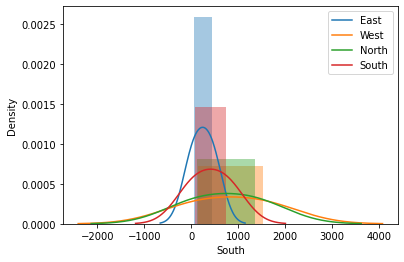

In [11]:
sns.distplot(data1['East'])
sns.distplot(data1['West'])
sns.distplot(data1['North'])
sns.distplot(data1['South'])
plt.legend(['East','West','North','South'])

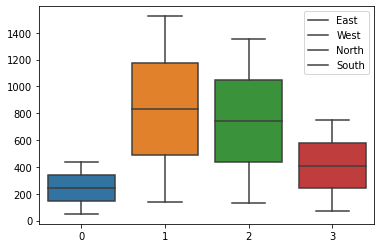

In [14]:
sns.boxplot(data=[data1['East'],data1['West'],data1['North'],data1['South']])
plt.legend(['East','West','North','South'])

In [15]:
alpha=0.05
Male = [50,142,131,70]
Female=[435,1523,1356,750]
Sales=[Male,Female]
print(Sales)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [19]:
chiStats = scipy.stats.chi2_contingency(Sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')
if chiStats[1] < 0.05:  
    print('we reject null hypothesis')
else:
    print('we accept null hypothesis')

Test t=1.595946 p-value=0.660309
Interpret by p-Value
we accept null hypothesis


In [25]:
#critical value = 0.1
alpha = 0.05
critical_value = scipy.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
# Find the critical value for 95% confidence*                      
#degree of freedom
observed_chi_val = chiStats[0]
#if observed chi-square < critical chi-square, then variables are not related
#if observed chi-square > critical chi-square, then variables are not independent (and hence may be related).
print('Interpret by critical value')
if observed_chi_val <= critical_value:   # observed value is not in critical area therefore we accept null hypothesis\n
    print ('Null hypothesis cannot be rejected (variables are not related)')
else:  # observed value is in critical area therefore we reject null hypothesis
    print ('Null hypothesis cannot be excepted (variables are not independent)')

Interpret by critical value
Null hypothesis cannot be rejected (variables are not related)


Inference : proportion of male and female across regions is same